# A Customer Churn Prediction
### Project Scenario
Every company wants to increase its profit or revenue margin and customer retention is one key area industry players focus their resources. In today's world of machine learning, most companies build classification models to perform churn analysis on their customers. 

Classification in machine learning and statistics entails a supervised learning approach where the computer program learns from provided data to make new observations or classifications. The primary objective is to determine the class or category into which new data points will fall. In this project scenario, an elaborate analysis will be conducted to train at least four models for predicting customer churn in a telecom company. This analysis will adhere to the **CRISP-DM framework**, ensuring a structured and systematic approach to model development and evaluation.

##### In this project I will be using the CRISP-DM Frame work for analysis
##### <h1 style="text-decoration: underline;">Business Understanding</h1>

***Objective:***

The primary objective of this project is to develop a classification model for churn analysis to aid in customer retention efforts. Churn analysis focuses on predicting whether customers are likely to leave or continue their relationship with the company. By identifying customers at risk of churning, the company can take proactive measures to retain them, thus increasing revenue and profit margins.

***Background:***

In today's competitive b**usiness landscape, customer retention is paramount for sustaining profitability and growth. Retaining existing customers is often more cost-effective than acquiring new ones. Churn analysis leverages machine learning and statistical techniques to predict customer behavior and identify potential churners before they defect to competitors.

***Data Description:***

The project will utilize historical data encompassing various customer attributes, transactional details, and behavioral patterns. These may include demographic information, purchase history, engagement metrics, customer service interactions, and any other relevant data points. The dataset will be sufficiently large and diverse to capture the complexities of customer behavior across different segments.

***Methodology:***

The project will employ a supervised learning approach, specifically classification algorithms, to train predictive models. These models will learn from past instances of churn and non-churn events to classify new customers accordingly. Various classification algorithms such as logistic regression, decision trees, random forests, and gradient boosting will be explored to identify the most effective model for the given dataset.

***Key Deliverables:***

1. Churn Prediction Model: A robust machine learning model capable of accurately predicting customer churn based on input features.
2. Feature Importance Analysis: Identification of the most influential factors driving churn, providing actionable insights for targeted retention strategies.
3. Model Evaluation: Rigorous evaluation of model performance using appropriate metrics such as accuracy, precision, recall, and F1-score. The model will be validated using techniques like cross-validation and holdout validation to ensure generalizability.
4. Deployment Strategy: Recommendations for integrating the churn prediction model into the company's existing systems or workflows for real-time monitoring and intervention.

***Expected Outcomes:***

By leveraging the insights gained from the churn analysis model, the company expects to:

- Proactively identify customers at risk of churn.
- Tailor retention strategies and incentives to address specific customer needs and pain points.
- Optimize resource allocation by focusing retention efforts on high-value customers with the highest churn propensity.
- Ultimately, improve overall customer retention rates, thereby enhancing long-term profitability and competitiveness in the market.

***Conclusion:***

Churn analysis represents a strategic initiative aimed at leveraging data-driven insights to mitigate customer attrition and foster long-term loyalty. By harnessing the power of classification models, the company endeavors to enhance customer retention efforts, drive sustainable revenue growth, and maintain a competitive edge in the dynamic marketplace.

### Hypothesis
Hypothesis 1
Null Hypothesis (Ho): Customers with longer tenure (number of months stayed with the company) are more likely to churn compared to new customers.


Alternative Hypothesis (Ha): Customers with longer tenure (number of months stayed with the company) are less likely to churn compared to new customers.

Hypothesis 2
Null Hypothesis (Ho): Customers with higher monthly charges (MonthlyCharges) are more likely to churn due to cost considerations.

Alternative Hypothesis (Ha): Customers with higher monthly charges (MonthlyCharges) are less likely to churn due to cost considerations.

### Business Questions
1. What is the average tenure of customers who churned compared to those who stayed?
2. Do customers with partners or dependents have a lower churn rate?
3. How does the presence of multiple lines affect customer churn?
4. Is there a correlation between the contract term (Contract) and customer churn?
5. What are the common payment methods (Payment Method) among customers who churned?
6. How does the availability of tech-related services (e.g., OnlineSecurity, TechSupport) impact churn rates?
7. What percentage of customers who churned had streaming services (StreamingTV, StreamingMovies)?
8. Is there a difference in churn rates between senior citizens and non-senior citizens?
9. How does the total amount charged to customers (TotalCharges) correlate with churn behavior?
10. How does the contract affect churn rates?

In [97]:
from dotenv import dotenv_values 
import pyodbc 
import numpy as np
import pandas as pd                          
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import fisher_exact
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from scipy.stats import chi2_contingency
from scipy.stats import stats
import warnings
warnings.filterwarnings('ignore')

print("🛬 Imported all packages.", "Warnings hidden. 👻")

🛬 Imported all packages. Warnings hidden. 👻


## Step 2 - Data Understanding
The data for this project is in differnt files and will be loaded into the notebook. The following describes the columns present in the data.

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)

#### First Dataset
I'm using Python's dotenv with a .env file to safely fetch the first dataset from a SQL database into my notebook. This keeps my database credentials private while allowing easy access to the data for analysis.

In [98]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [99]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [100]:
# Use the connect method of the pyodbc library and pass in the connection string.

connection = pyodbc.connect(connection_string)

In [101]:
# Sql query to get the 2020 data
query = "Select * FROM LP2_Telco_churn_first_3000"
First_Dataset = pd.read_sql(query, connection)

In [102]:
# Preview of the first Data set 
First_Dataset.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [103]:
First_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


#### Second Dataset
I obtained the second dataset from a GitHub repository, and I'll use Pandas to import the CSV file into my notebook for analysis.

In [104]:
# Loading the second dataset into the notebook
Second_Dataset = pd.read_csv(r"Data/LP2_Telco-churn-second-2000.csv")

In [105]:
Second_Dataset.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.5,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.0,1046.5,Yes


In [106]:
Second_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


#### Third Dataset
I obtained the third dataset from a OneDrive file, and I will use Pandas to import the Excel file into the notebook for analysis.

In [107]:
# Loading the second dataset into the notebook
Third_Dataset = pd.read_excel(r"Data/Telco-churn-last-2000.xlsx")


In [108]:
Third_Dataset.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8


In [109]:
Third_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [110]:
# Checking if the first and second Dataset have the same column names for easy concatenation
# Get the column names from each DataFrame
columns_First_Dataset = set(First_Dataset.columns)
columns_Second_Dataset = set(Second_Dataset.columns)

# Check if all DataFrames have the same column names
if columns_First_Dataset == columns_Second_Dataset:
    print("All DataFrames have the same column names.")
else:
    print("Not all DataFrames have the same column names.")

All DataFrames have the same column names.


Concatenating the first and second Dataset to prepare them for analysis and training

In [111]:
train_df = pd.concat([First_Dataset, Second_Dataset], ignore_index=True)

In [112]:
train_df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False


In [113]:
# Change all column names to lowercase
train_df.columns = train_df.columns.str.lower()

In [114]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 


In [115]:
train_df.isnull().sum()

customerid            0
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines       269
internetservice       0
onlinesecurity      651
onlinebackup        651
deviceprotection    651
techsupport         651
streamingtv         651
streamingmovies     651
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          5
churn                 1
dtype: int64

In [116]:
#Checking  for unique values in all the columns
cols= [ 'customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']


results = []

for i in cols:
    
    unique_values = train_df[i].unique()
    num_unique_values = train_df[i].nunique()
    
    
    results.append([i, unique_values, num_unique_values])


results_df = pd.DataFrame(results, columns=['Column', 'Unique_Values', 'Num_Unique_Values'])


results_df

,Column,Unique_Values,Num_Unique_Values
0,customerid,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",5043
1,gender,"[Female, Male]",2
2,seniorcitizen,"[0, 1]",2
3,partner,"[True, False, No, Yes]",4
4,dependents,"[False, True, No, Yes]",4
5,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
6,phoneservice,"[False, True, Yes, No]",4
7,multiplelines,"[None, False, True, No, No phone service, Yes]",5
8,internetservice,"[DSL, Fiber optic, No]",3
9,onlinesecurity,"[False, True, None, No, Yes, No internet service]",5


In [117]:
# Function replace None with Pandas NaN
def replace_none(value):
    like_nan = {'none', ''}
    if pd.isnull(value) or (isinstance(value, str) and (value.lower().strip() in like_nan)):
        value = pd.NA
    
    return value

# Apply the function to all columns
train_df = train_df.applymap(replace_none) # element-wise

To ensure consistent and uniform data entry, I am standardizing certain columns by replacing all occurrences of False with No and all occurrences of True with Yes. This process helps maintain clarity and consistency in the data, making it easier to interpret and analyze.

In [118]:
# Define the mapping for standardization
standardize_mapping = {
    'No phone service': 'No',
    'No internet service': 'No',
    True: 'Yes',
    False: 'No',
}

# Columns to perform standardization
cols_to_standardize = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
                       'streamingtv', 'streamingmovies', 'paperlessbilling', 'churn',
                       'phoneservice', 'multiplelines', 'partner', 'dependents']

# Loop through columns for standardization
for col in cols_to_standardize:
    if train_df[col].dtype == 'object':
        train_df[col] = train_df[col].replace(standardize_mapping)


Handling Missing Values: To address missing values in specific columns, I checked for null values and filled them by randomly selecting a value from each column with missing data.

In [119]:
train_df.isnull().sum()

customerid            0
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines       269
internetservice       0
onlinesecurity      651
onlinebackup        651
deviceprotection    651
techsupport         651
streamingtv         651
streamingmovies     651
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          8
churn                 1
dtype: int64

Filling the missing values in 'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies' with a 'NO' value 

In [120]:
# # Filling all missing values with 'no'
cols_to_use = ['multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']
for values in cols_to_use:
    if train_df[values].isna().any() == True:
        train_df[values] = train_df[values].fillna('No')
        

Filling the missing values in the totalcharges column with their corresponding values in the monthlycharge column

In [121]:
#Creating a mask variable for the missing values in the column for totalcharges
mask = train_df['totalcharges'].isna()

# Filling the missing values of totalcharge with the values of the monthlycharge
train_df['totalcharges'].fillna(train_df.loc[mask,'monthlycharges'], inplace = True)


Changing the datatype of the Total Charges column from string to float

In [122]:
train_df['totalcharges'] = train_df['totalcharges'].astype(float)

Filling the missing value in the churn column with the mode

In [123]:
# Filling the missing value in the churn column with mode
mode_churn = train_df['churn'].mode()[0]
train_df['churn'] = train_df['churn'].fillna(mode_churn)


Dropping the customerid column from our Data Frame as we will not need it for analysis

In [124]:
train_df.drop('customerid', axis=1,inplace =True)

In [125]:
train_df.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [126]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   seniorcitizen     5043 non-null   int64  
 2   partner           5043 non-null   object 
 3   dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   phoneservice      5043 non-null   object 
 6   multiplelines     5043 non-null   object 
 7   internetservice   5043 non-null   object 
 8   onlinesecurity    5043 non-null   object 
 9   onlinebackup      5043 non-null   object 
 10  deviceprotection  5043 non-null   object 
 11  techsupport       5043 non-null   object 
 12  streamingtv       5043 non-null   object 
 13  streamingmovies   5043 non-null   object 
 14  contract          5043 non-null   object 
 15  paperlessbilling  5043 non-null   object 
 16  paymentmethod     5043 non-null   object 


In [127]:
train_df.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [128]:
numerical_columns = train_df.select_dtypes('number').columns
numerical_columns

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges'], dtype='object')

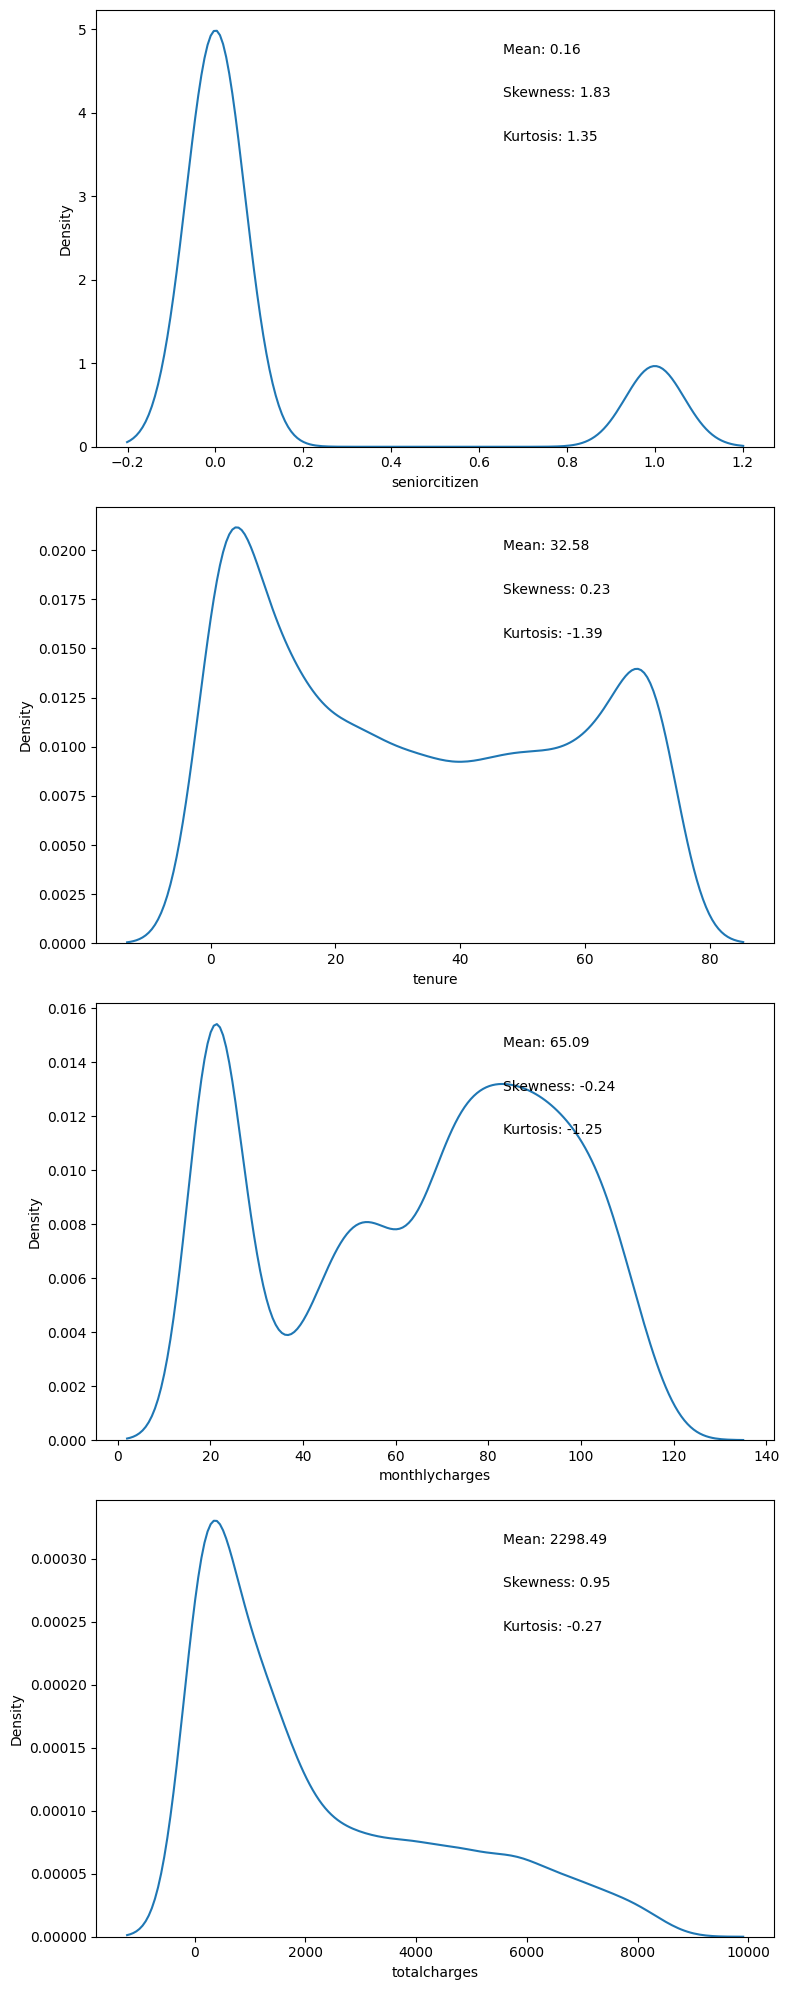

In [129]:
# Plot KDEs(kernel density estimation) for all columns
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(8, 20))
for i, col in enumerate(numerical_columns):
    sns.kdeplot(data=train_df, x=col, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
   
    # Calculate mean, skewness, and kurtosis
    mean_val = train_df[col].mean()
    skewness_val = train_df[col].skew()
    kurtosis_val = train_df[col].kurtosis()
   
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
   
plt.tight_layout()
plt.show()

### Univariate Analysis:

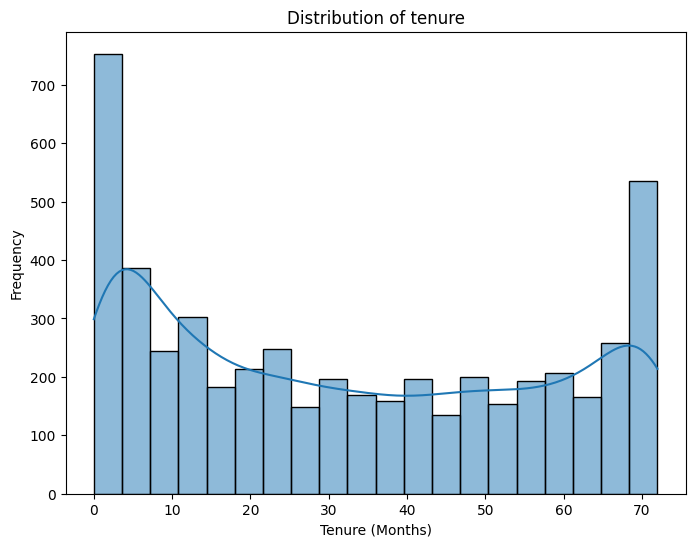

Summary statistics for Tenure:
count    5043.000000
mean       32.576641
std        24.529807
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


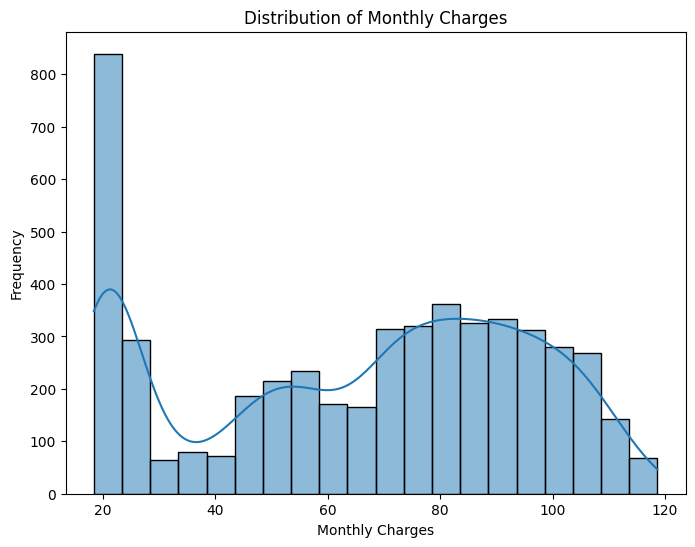


Summary statistics for Monthly Charges:
count    5043.000000
mean       65.090214
std        30.068133
min        18.400000
25%        35.775000
50%        70.550003
75%        90.050003
max       118.650002
Name: monthlycharges, dtype: float64


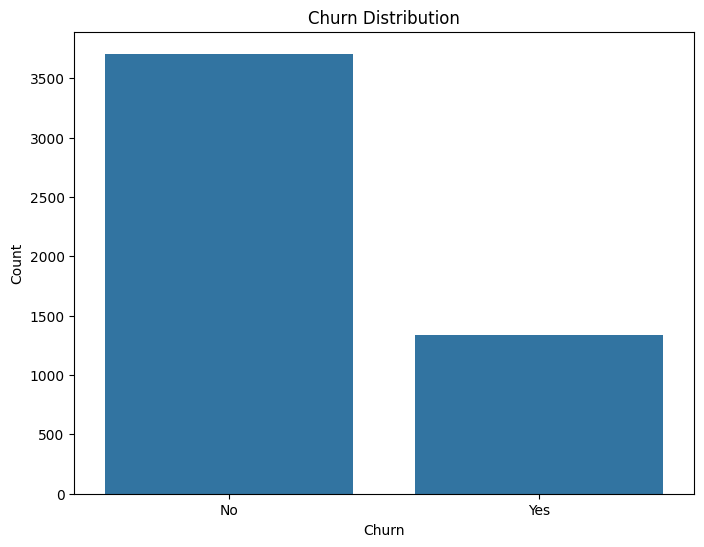


Churn distribution:
churn
No     3707
Yes    1336
Name: count, dtype: int64


In [130]:
# Tenure
plt.figure(figsize=(8, 6))
sns.histplot(train_df['tenure'], bins=20, kde=True)
plt.title('Distribution of tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()
 
print("Summary statistics for Tenure:")
print(train_df['tenure'].describe())
 
# Monthly Charges
plt.figure(figsize=(8, 6))
sns.histplot(train_df['monthlycharges'], bins=20, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()
 
print("\nSummary statistics for Monthly Charges:")
print(train_df['monthlycharges'].describe())
 
# Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()
 
print("\nChurn distribution:")
print(train_df['churn'].value_counts())

### Bivariate Analysis:


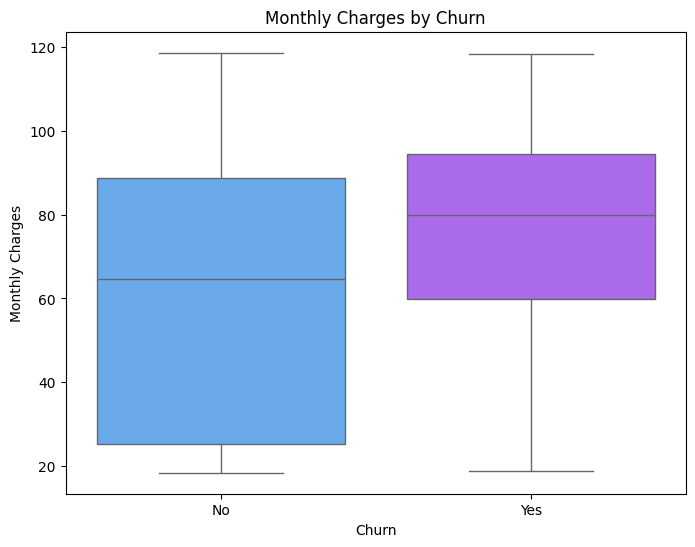

In [131]:
# Box plot of MonthlyCharges across Churn categories
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_df, x='churn', y='monthlycharges', palette='cool')
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

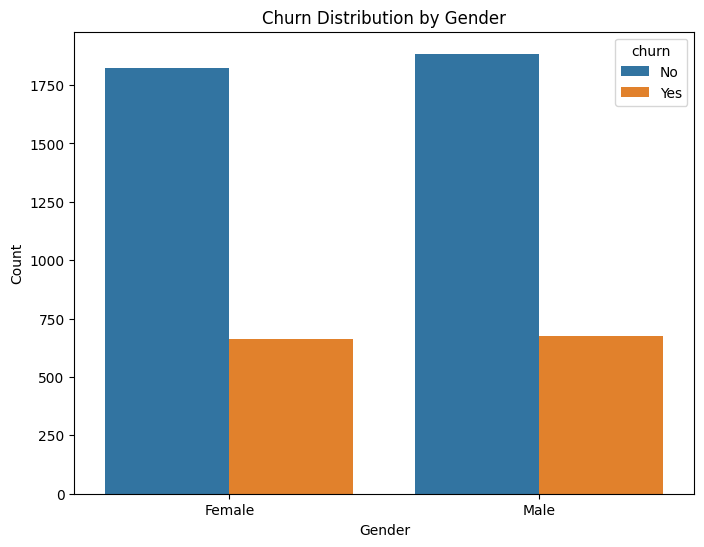

Churn Rate by Gender:
churn         No       Yes
gender                    
Female  0.733897  0.266103
Male    0.736225  0.263775


In [132]:
# Visualizing the relationship between gender and churn
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='gender', hue='churn')
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
 
# Calculating churn rate by gender
churn_rate_gender = train_df.groupby('gender')['churn'].value_counts(normalize=True).unstack()
print("Churn Rate by Gender:")
print(churn_rate_gender)

### Multivariate Analysis:

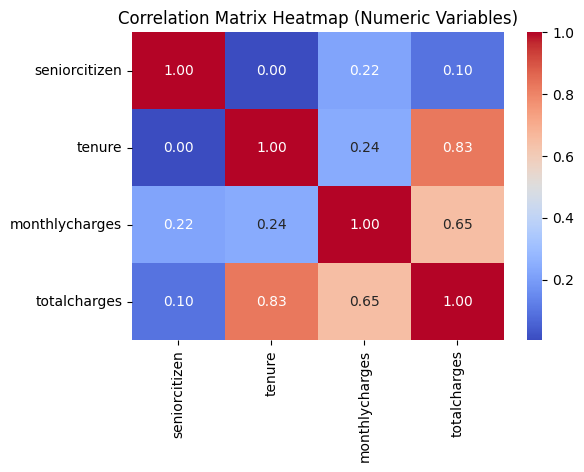

In [133]:
# Separate numeric and categorical columns
numeric_columns = train_df.select_dtypes(include=['number']).columns
categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns

# Correlation Matrix and Heatmap for Numeric Variables
numeric_df = train_df[numeric_columns]
numeric_correlation_matrix = numeric_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Numeric Variables)')
plt.show()

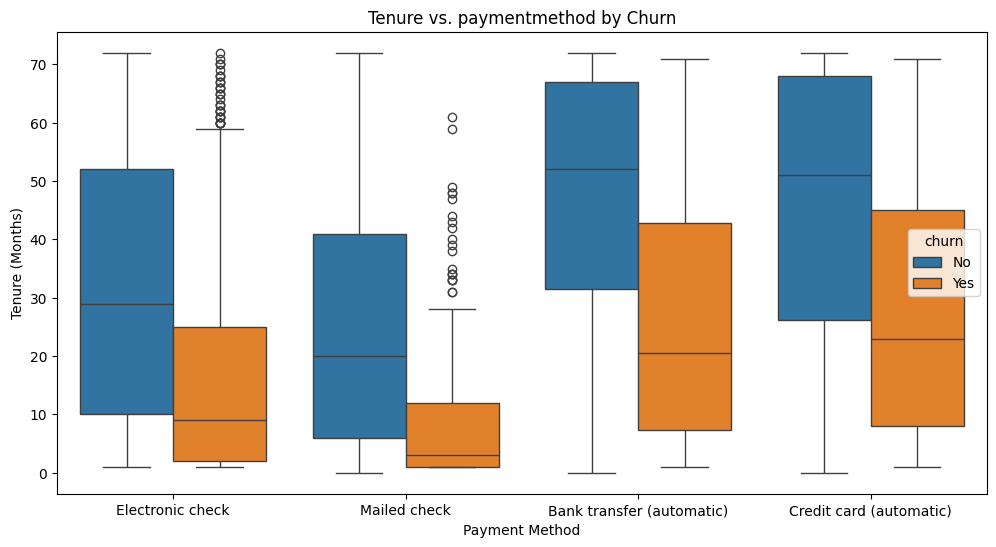

In [134]:
# Box plot of Tenure vs. MonthlyCharges vs churn
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='paymentmethod', y='tenure', hue='churn')
plt.title('Tenure vs. paymentmethod by Churn')
plt.xlabel('Payment Method')
plt.ylabel('Tenure (Months)')
plt.legend(title='churn')
plt.show()

#### Key Insights
1. I observed that many categorical columns contain values such as "NO," "Yes," "False," and "True." I will update all "True" values to "Yes" and all "False" values to "No."
2. I standardized the case of all columns in the DataFrame to lowercase letters for uniformity.
3. 

### Answering Business Questions with Visualizations

#### Q1. What is the average tenure of customers who churned compared to those who stayed?

In [135]:
# Separate customers who churned from those who stayed
churned_customers = train_df[train_df['churn'] == 'Yes']
stayed_customers = train_df[train_df['churn'] == 'No']

# Calculate the average tenure for each group
avg_tenure_churned = churned_customers['tenure'].mean()
avg_tenure_stayed = stayed_customers['tenure'].mean()

# Compare the average tenure of the two groups
print("Average tenure of churned customers:", avg_tenure_churned)
print("Average tenure of stayed customers:", avg_tenure_stayed)

Average tenure of churned customers: 18.24176646706587
Average tenure of stayed customers: 37.74291880226598


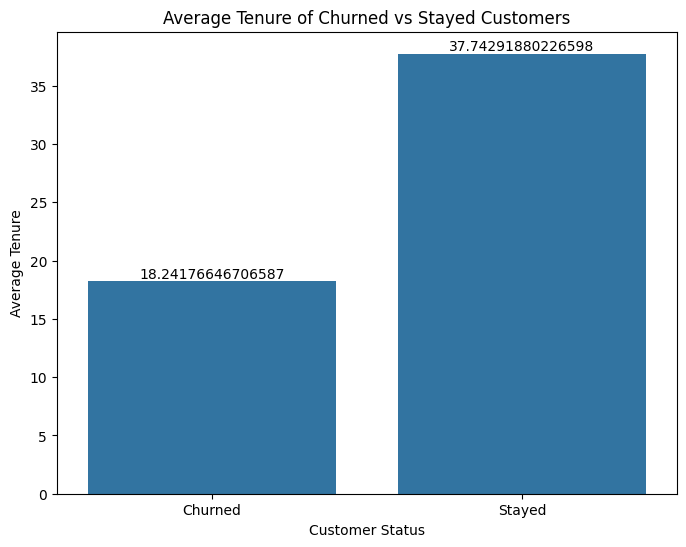

In [136]:
# Visualizing the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Churned', 'Stayed'], y=[avg_tenure_churned, avg_tenure_stayed])
plt.title('Average Tenure of Churned vs Stayed Customers')
plt.xlabel('Customer Status')
plt.ylabel('Average Tenure')

# Adding data labels
for index, value in enumerate([avg_tenure_churned, avg_tenure_stayed]):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

#### Q2. Do customers with partners or dependents have a lower churn rate?

In [137]:
# Calculate churn rate for customers with partners
partner_churn_rate = train_df[train_df['partner'] == 'Yes']['churn'].value_counts(normalize=True)['Yes']

# Calculate churn rate for customers without partners
no_partner_churn_rate = train_df[train_df['partner'] == 'No']['churn'].value_counts(normalize=True)['Yes']

# Calculate churn rate for customers with dependents
dependent_churn_rate = train_df[train_df['dependents'] == 'Yes']['churn'].value_counts(normalize=True)['Yes']

# Calculate churn rate for customers without dependents
no_dependent_churn_rate = train_df[train_df['dependents'] == 'No']['churn'].value_counts(normalize=True)['Yes']


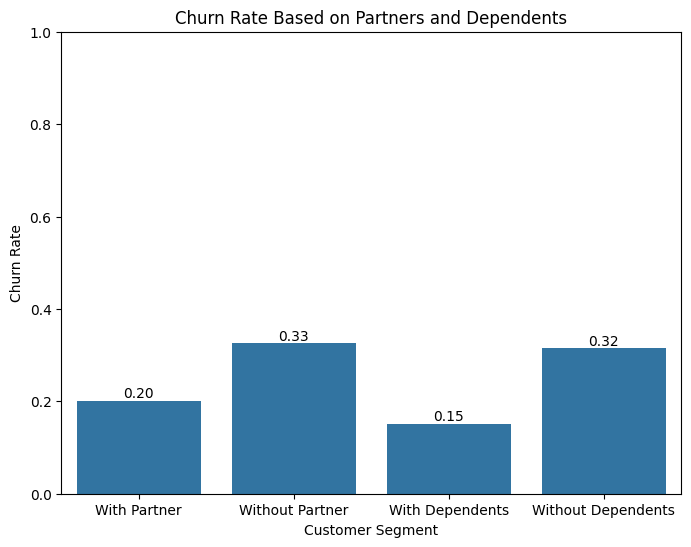

In [138]:
# Visualize the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['With Partner', 'Without Partner', 'With Dependents', 'Without Dependents'], 
            y=[partner_churn_rate, no_partner_churn_rate, dependent_churn_rate, no_dependent_churn_rate])
plt.title('Churn Rate Based on Partners and Dependents')
plt.xlabel('Customer Segment')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)  
# Set y-axis limits from 0 to 1

# Adding data labels
for index, value in enumerate([partner_churn_rate, no_partner_churn_rate, dependent_churn_rate, no_dependent_churn_rate]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()

#### Question 3: How does the presence of multiple lines affect customer churn?

To analyze this question, we can:

- Visualize the distribution of churn among customers with and without multiple lines.
- Calculate the churn rate for customers with and without multiple lines.
- Conduct a statistical test (such as a chi-square test) to determine if there is a significant association between the presence of multiple lines and churn.

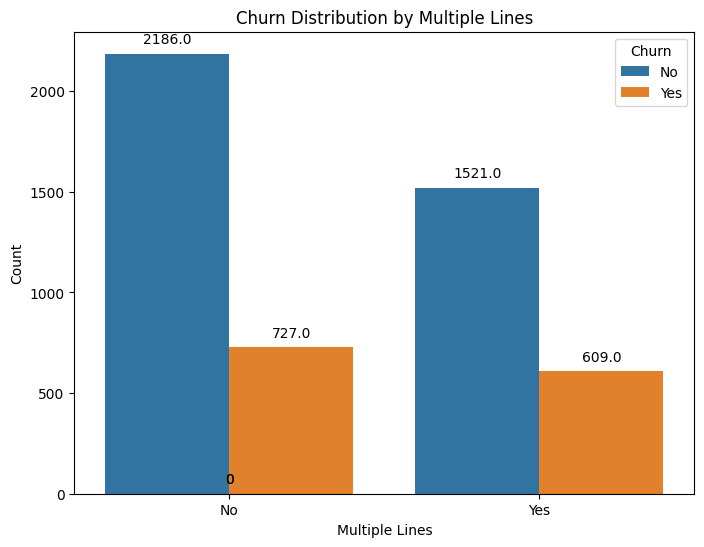

Churn Rate by Presence of Multiple Lines:
churn                No       Yes
multiplelines                    
No             0.750429  0.249571
Yes            0.714085  0.285915

Chi-square Test Results for Multiple Lines and Churn:
Chi-square value: 8.160054933336287
p-value: 0.004282307420627073


In [139]:
# Plotting the relationship between multiple lines and churn
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='multiplelines', hue='churn')

# Adding data labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title('Churn Distribution by Multiple Lines')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Calculating churn rate by presence of multiple lines
churn_rate_multiple_lines = train_df.groupby('multiplelines')['churn'].value_counts(normalize=True).unstack()
print("Churn Rate by Presence of Multiple Lines:")
print(churn_rate_multiple_lines)

# Chi-square test for association between multiple lines and churn
chi2, p_val, _, _ = chi2_contingency(pd.crosstab(train_df['multiplelines'], train_df['churn']))
print("\nChi-square Test Results for Multiple Lines and Churn:")
print("Chi-square value:", chi2)
print("p-value:", p_val)


#### **Key Insights**

- Customers with multiple lines tend to have a slightly higher churn rate compared to those without multiple lines.

- The chi-square test results suggest that the presence of multiple lines is significantly associated with churn.

This indicates that the presence of multiple lines may influence customer churn behavior, and it could be an important factor to consider in churn prediction and retention strategies.
Overall, these insights suggest that the presence of multiple lines could be a relevant factor in understanding and predicting customer churn.

#### Question 4: Is there a correlation between the contract term (Contract) and customer churn?

For this question, we can:

- Visualize the distribution of churn across different contract terms.
- Calculate the churn rate for each contract term category.
- Analyze the relationship between contract term and churn using a chi-square test or other appropriate statistical test.
- Additionally, we can examine the average tenure for customers with different contract terms to understand the potential impact on churn.

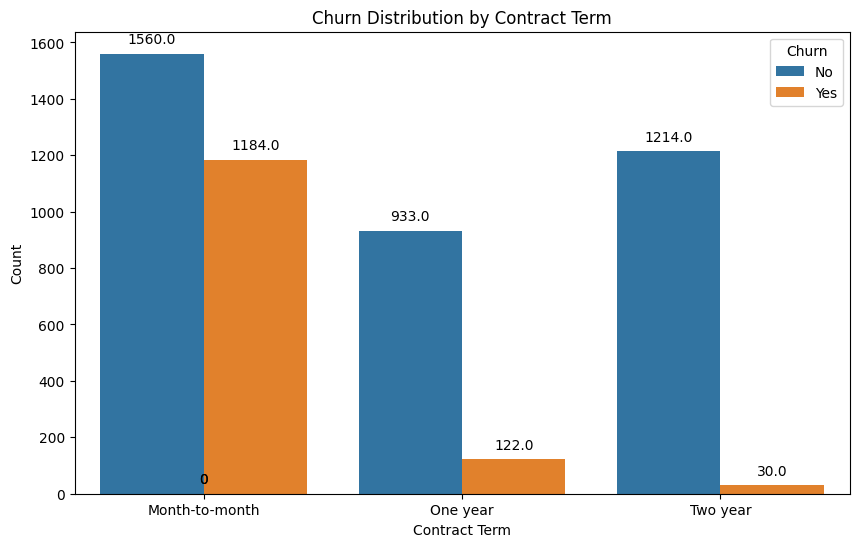


Churn Rate by Contract Term:
churn                 No       Yes
contract                          
Month-to-month  0.568513  0.431487
One year        0.884360  0.115640
Two year        0.975884  0.024116

Chi-square Test Results for Contract Term and Churn:
Chi-square value: 882.0901975577578
p-value: 2.86119415951209e-192


In [140]:
# Plotting the relationship between contract term and churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train_df, x='contract', hue='churn')

# Adding data labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title('Churn Distribution by Contract Term')
plt.xlabel('Contract Term')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Calculating churn rate by contract term
churn_rate_contract = train_df.groupby('contract')['churn'].value_counts(normalize=True).unstack()
print("\nChurn Rate by Contract Term:")
print(churn_rate_contract)

# Chi-square test for association between contract term and churn
chi2, p_val, _, _ = chi2_contingency(pd.crosstab(train_df['contract'], train_df['churn']))
print("\nChi-square Test Results for Contract Term and Churn:")
print("Chi-square value:", chi2)
print("p-value:", p_val)

#### **Key Insights**

- Customers with longer contract terms (one year and two years) have significantly lower churn rates compared to those with month-to-month contracts.

- The chi-square test results confirm that there is a strong association between contract term and churn.
This suggests that the contract term is a critical factor influencing customer churn behavior, with longer-term contracts leading to lower churn rates.

Overall, these insights indicate that contract term is a significant predictor of customer churn, and it should be a key consideration in churn prediction models and retention strategies. Offering longer-term contracts may help reduce churn and improve customer retention rates.

### QN5. What are the common payment methods (Payment Method) among customers who churned?

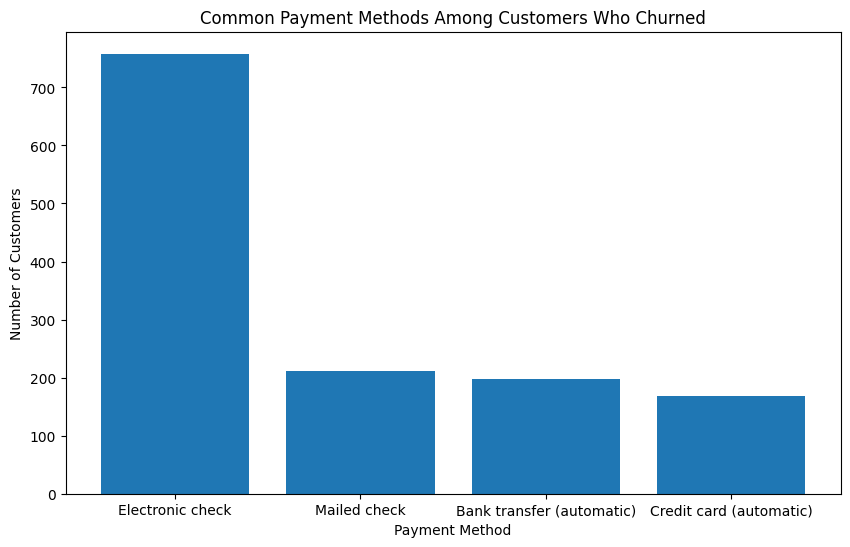

In [141]:
churned_customers = train_df[train_df['churn'] == 'Yes']
common_payment_methods = churned_customers['paymentmethod'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(common_payment_methods.index, common_payment_methods.values)
plt.title('Common Payment Methods Among Customers Who Churned')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.show()

##     **Key Insights**
####      -*From the plot shown above, the common payment method for clients who churned is using Electronic check.*

### QN6. How does the availability of tech-related services (e.g., OnlineSecurity, TechSupport) impact churn rates?

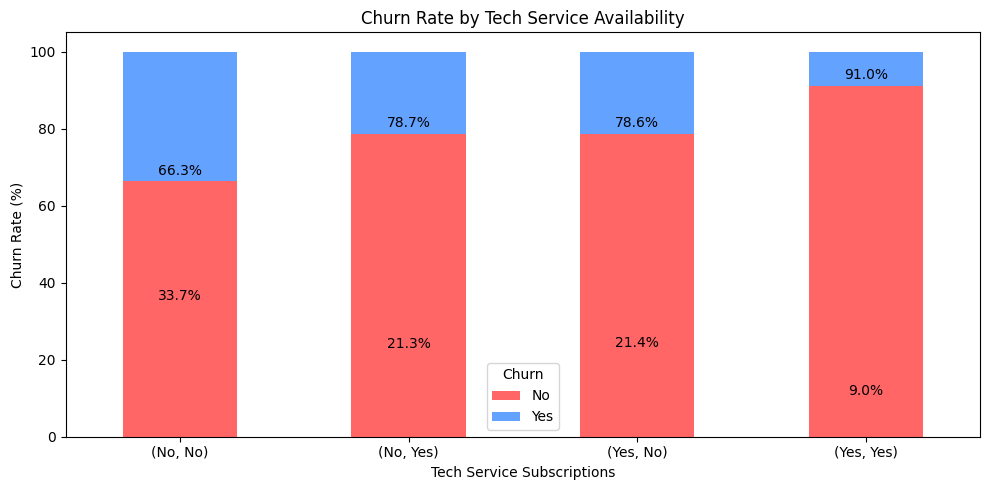

In [142]:
# Group data by subscription to tech services and churn
tech_service_groups = train_df.groupby(['onlinesecurity', 'techsupport', 'churn'])['gender'].count().unstack(fill_value=0)

# Calculate churn rate for each group
churn_rate = tech_service_groups.div(tech_service_groups.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 5))  # Create a figure and axis for better control
churn_rate.plot(kind='bar', stacked=True, color=['#FF6665', '#63A2FF'], ax=ax)
plt.xlabel('Tech Service Subscriptions')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tech Service Availability')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Add percentage labels to bars
for container in ax.containers:
    rects = container.get_children()
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 1, f"{height:.1f}%", ha='center', va='bottom')

plt.legend(title='Churn')
plt.tight_layout()  # Adjust spacing to accommodate labels
plt.show()

- The chart suggests customers with no tech support are most likely to churn, while those with both security and support have the lowest churn rate. 

#### QN 7. What percentage of customers who churned had streaming services (StreamingTV, StreamingMovies)?
 

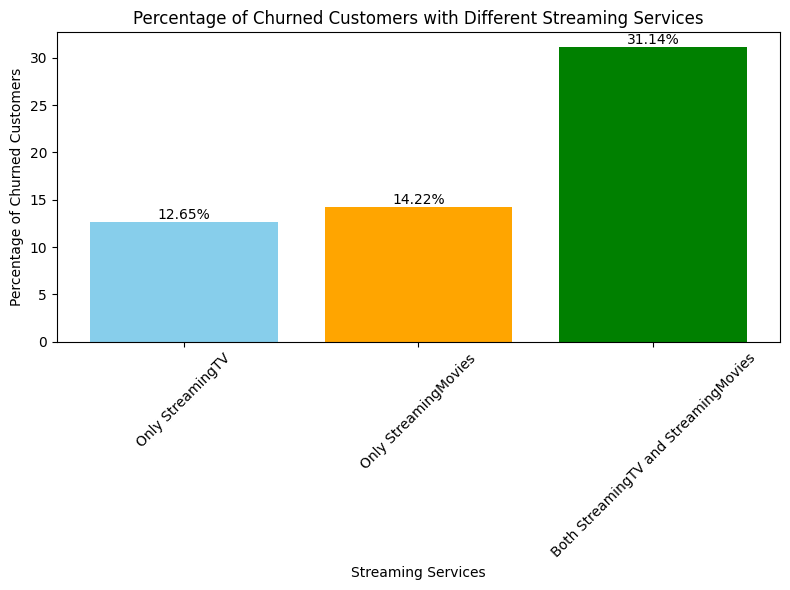

In [143]:

# Filter the DataFrame to include only churned customers
churned_customers = train_df[train_df['churn'] == 'Yes']
 
# Calculate the number of churned customers with different streaming services
streaming_tv_churned_count = len(churned_customers[(churned_customers['streamingtv'] == 'Yes') & (churned_customers['streamingmovies'] == 'No')])
streaming_movies_churned_count = len(churned_customers[(churned_customers['streamingtv'] == 'No') & (churned_customers['streamingmovies'] == 'Yes')])
both_streaming_churned_count = len(churned_customers[(churned_customers['streamingtv'] == 'Yes') & (churned_customers['streamingmovies'] == 'Yes')])
 
# Calculate the total number of churned customers
total_churned_customers = len(churned_customers)
 
# Calculate the percentage of churned customers for each category
percentage_streaming_tv_churned = (streaming_tv_churned_count / total_churned_customers) * 100
percentage_streaming_movies_churned = (streaming_movies_churned_count / total_churned_customers) * 100
percentage_both_streaming_churned = (both_streaming_churned_count / total_churned_customers) * 100
 
# Plotting the grouped bar plot
categories = ['Only StreamingTV', 'Only StreamingMovies', 'Both StreamingTV and StreamingMovies']
percentages = [percentage_streaming_tv_churned, percentage_streaming_movies_churned, percentage_both_streaming_churned]
 
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, percentages, color=['skyblue', 'orange', 'green'])
 
# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')
 
plt.xlabel('Streaming Services')
plt.ylabel('Percentage of Churned Customers')
plt.title('Percentage of Churned Customers with Different Streaming Services')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### QN 8.Is there a difference in churn rates between senior citizens and non-senior citizens?

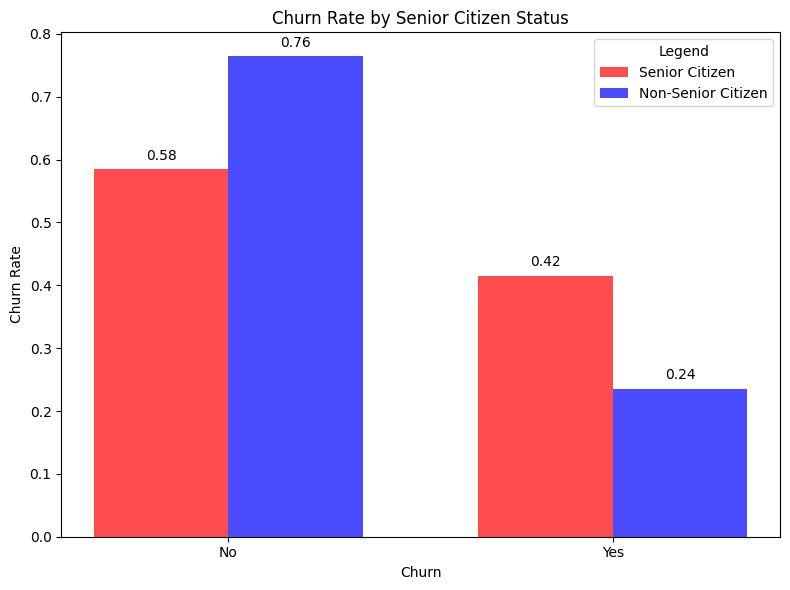

In [144]:
# Calculate churn rates for senior and non-senior citizens
senior_churn_rate = train_df[train_df['seniorcitizen'] == 1]['churn'].value_counts(normalize=True)
non_senior_churn_rate = train_df[train_df['seniorcitizen'] == 0]['churn'].value_counts(normalize=True)

# Plotting the grouped bar plot
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = range(len(senior_churn_rate))

bars1 = plt.bar(index, senior_churn_rate, bar_width, color='red', label='Senior Citizen', alpha=0.7)
bars2 = plt.bar([i + bar_width for i in index], non_senior_churn_rate, bar_width, color='blue', label='Non-Senior Citizen', alpha=0.7)

# Adding data labels to each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.xlabel('Churn')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Senior Citizen Status')
plt.xticks([i + bar_width / 2 for i in index], senior_churn_rate.index)
plt.legend(title='Legend')
plt.tight_layout()
plt.show()



#### Hypothesis Testing

Test 1

<Figure size 1050x600 with 0 Axes>

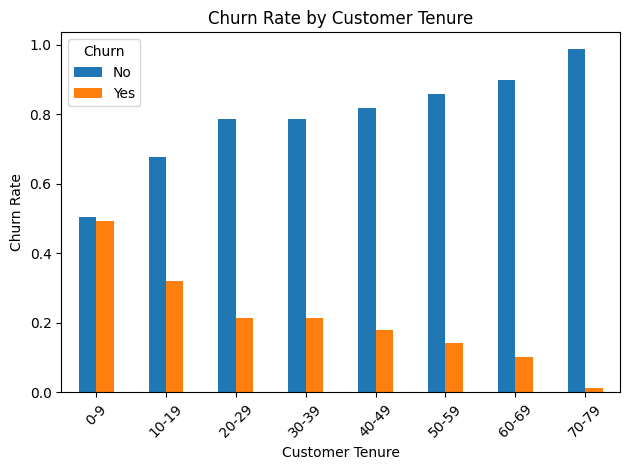

In [145]:
# Group the data by customer tenure range and calculate the churn rate
bins = [0] + [10 * i for i in range(1, 9)] # Define bins for grouping
labels = [f"{i}-{i+9}" for i in range(0, 80, 10)]  # Define labels for the bins
train_df['Tenure_Group'] = pd.cut(train_df['tenure'], bins=bins, labels=labels, include_lowest=True)
grouped_data = train_df.groupby('Tenure_Group')['churn'].value_counts(normalize=True).unstack()
 
# Plotting the bar plot
plt.figure(figsize=(10.5, 6))
grouped_data.plot(kind='bar')
plt.xlabel('Customer Tenure')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Customer Tenure')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Churn')
plt.tight_layout()  # Adjust layout for better visualization
plt.show()
 

In [146]:
# Encode 'churn' column into numeric values
train_df['churn_numeric'] = train_df['churn'].replace({'Yes': 1, 'No': 0})

# Calculate the median value for tenure
median_tenure = train_df['tenure'].median()

# Divide the data into two categories
long_tenure = train_df[train_df['tenure'] >= median_tenure]['churn_numeric']
short_tenure = train_df[train_df['tenure'] < median_tenure]['churn_numeric']

# Perform Fisher's exact test
odds_ratio, p_value = fisher_exact([[long_tenure.sum(), short_tenure.sum()],
                                    [len(long_tenure), len(short_tenure)]])

# Print the test statistic (odds ratio) and p-value
print("Odds ratio:", odds_ratio)
print("P-value:", p_value)

# State the significance level
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in churn rates between customers with shorter and longer tenure.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in churn rates between customers with shorter and longer tenure.")



Odds ratio: 0.33632517216350666
P-value: 2.8376888726914e-62
Reject Null Hypothesis: There is a significant difference in churn rates between customers with shorter and longer tenure.


Test 2

In [147]:
# Encode 'churn' column into numeric values
train_df['churn_numeric'] = train_df['churn'].replace({'Yes': 1, 'No': 0})

# Calculate the median value for monthlycharge
median_monthlycharge = train_df['monthlycharges'].median()

# Divide the data into two categories
high_monthlycharge = train_df[train_df['monthlycharges'] >= median_monthlycharge]['churn_numeric']
low_monthlycharge = train_df[train_df['monthlycharges'] < median_monthlycharge]['churn_numeric']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(high_monthlycharge, low_monthlycharge)

# Print the test statistic (U statistic) and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# State the significance level
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in churn rates between customers with higher and lower monthly charge.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in churn rates between customers with higher and lower monthly charge.")


Mann-Whitney U statistic: 3743974.5
P-value: 2.219391973354535e-46
Reject Null Hypothesis: There is a significant difference in churn rates between customers with higher and lower monthly charge.


Using the Label Encoder to encode my categorical columns

In [148]:
# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # List of columns to encode
# columns_to_encode = ['gender', 'partner', 'dependents',
#                      'phoneservice', 'multiplelines', 'internetservice',
#                      'onlinesecurity', 'onlinebackup', 'deviceprotection',
#                      'techsupport', 'streamingtv', 'streamingmovies',
#                      'contract', 'paperlessbilling', 'paymentmethod', 'churn']

# # Encode each column
# for col in columns_to_encode:
#     train_df[col + '_encoded'] = label_encoder.fit_transform(train_df[col])

# train_df.head()